# Pulling Data from database

#### This section includes pulling mega data from SQL database by psycopg2
[Take Me to Psycopg2.9.3 Documentation](https://www.psycopg.org/docs/)

In [1]:
import psycopg2
from getpass import getpass

In [2]:
# Get password 
db_password = getpass("Enter database password.")

# Connect to an existing database
conn = psycopg2.connect(
    host = "database-1.cxmneo38riye.us-east-2.rds.amazonaws.com",
    database = "postgres",
    user = "postgres",
    password = db_password,    # Please reach out to admin if passcode is needed.
    port = "5432"
)

# Build cursor
cur = conn.cursor()

# Execute query
cur.execute("SELECT * FROM covid_stocks_with_covid_data")

rows = cur.fetchall()

# Create lists of datas
vac_comp_covid = []

for r in rows:
    vac_comp_covid.append(r)
    
cur.close()

Enter database password. ········


In [3]:
# Build cursor
cur = conn.cursor()

# Execute query
cur.execute("SELECT * FROM spx_sector_covid_data")

rows = cur.fetchall()

# Create lists of datas
spx_covid = []

for r in rows:
    spx_covid.append(r)
    
cur.close()

In [4]:
# Close cursor & connection

conn.close()

In [5]:
# Transforming list of lists into dataframe.
import pandas as pd

# Column names 
col_names1 = ["PandemicDate","DailyNewCases","DailyNewDeaths","StockTicker","OpenPrice","Highest","Lowest","Closing","TradingVolume","VolumnWeightedAVGPrice","Transactions"]
col_names2 = ["date","spx_close","hlth_close","cons_close","cond_close","enrs_close","finl_close","indu_close","inft_close","matr_close","rlst_close","tels_close","util_close","daily_new_cases","daily_new_deaths"]

covid_stocks_with_covid_data = pd.DataFrame(vac_comp_covid, columns = col_names1)

spx_sector_covid_data = pd.DataFrame(spx_covid, columns = col_names2)


In [6]:
# Preview
covid_stocks_with_covid_data

,PandemicDate,DailyNewCases,DailyNewDeaths,StockTicker,OpenPrice,Highest,Lowest,Closing,TradingVolume,VolumnWeightedAVGPrice,Transactions
0,2020-03-11,307.0,8.0,PFE,30.48,32.000,30.00,30.02,60585686.0,30.6586,307447.0
1,2020-03-12,1174.0,4.0,PFE,31.27,32.880,30.23,32.71,58156515.0,31.4335,313654.0
2,2020-03-15,1046.0,17.0,PFE,29.94,32.285,29.65,30.18,48333517.0,30.9841,270185.0
3,2020-03-16,1336.0,21.0,PFE,31.64,32.650,30.59,32.16,52139745.0,31.6114,317412.0
4,2020-03-17,2442.0,25.0,PFE,30.77,32.610,30.31,32.36,42228311.0,31.6159,249462.0
...,...,...,...,...,...,...,...,...,...,...,...
11197,None,67776.0,1165.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11198,None,85183.0,912.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11199,None,183372.0,1537.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11200,None,35725.0,1948.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Preview
spx_sector_covid_data

,date,spx_close,hlth_close,cons_close,cond_close,enrs_close,finl_close,indu_close,inft_close,matr_close,rlst_close,tels_close,util_close,daily_new_cases,daily_new_deaths
0,2020-03-12,2480.64,985.40,537.00,766.6017,221.69,336.66,490.22,1319.10,271.97,200.75,144.33,275.20,1174.0,4.0
1,2020-03-13,2711.02,1053.92,582.16,813.2361,241.29,381.20,528.60,1476.91,290.78,218.08,157.61,290.48,749.0,7.0
2,2020-03-16,2386.13,948.61,541.45,714.9846,208.41,327.87,468.10,1271.40,257.52,181.99,141.15,256.95,1336.0,21.0
3,2020-03-17,2529.19,1007.95,586.90,743.7777,209.92,346.78,487.75,1357.53,274.66,194.62,146.78,290.64,2442.0,25.0
4,2020-03-18,2398.1,973.71,568.91,707.1269,179.94,316.10,452.86,1295.22,257.74,180.10,142.65,277.16,3738.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,2021-12-28,4786.35,1637.97,798.18,1619.3360,427.25,653.01,893.07,3089.10,566.63,320.97,271.28,359.45,342971.0,2060.0
454,2021-12-29,4793.06,1647.76,801.54,1621.5600,424.55,652.58,894.53,3091.36,569.06,323.03,270.45,361.29,483137.0,1991.0
455,2021-12-30,4778.73,1650.43,798.96,1615.4200,421.68,650.89,891.03,3070.42,566.98,324.18,270.76,362.53,599380.0,1672.0
456,2021-12-31,4766.18,1643.92,804.60,1610.7560,422.74,650.04,894.96,3055.45,569.63,324.75,267.48,363.71,619997.0,1009.0


In [8]:
# Transforming PandemicDate to datetime format.
print(covid_stocks_with_covid_data.dtypes)
print(spx_sector_covid_data.dtypes)
covid_stocks_with_covid_data["PandemicDate"] = pd.to_datetime(covid_stocks_with_covid_data["PandemicDate"])
spx_sector_covid_data["date"] = pd.to_datetime(spx_sector_covid_data["date"])

# Re-check the format of datetime
print(covid_stocks_with_covid_data.dtypes)
print(spx_sector_covid_data.dtypes)

PandemicDate               object
DailyNewCases              object
DailyNewDeaths             object
StockTicker                object
OpenPrice                 float64
Highest                   float64
Lowest                    float64
Closing                   float64
TradingVolume             float64
VolumnWeightedAVGPrice    float64
Transactions              float64
dtype: object
date                 object
spx_close            object
hlth_close          float64
cons_close          float64
cond_close          float64
enrs_close          float64
finl_close          float64
indu_close          float64
inft_close          float64
matr_close          float64
rlst_close          float64
tels_close          float64
util_close          float64
daily_new_cases      object
daily_new_deaths     object
dtype: object
PandemicDate              datetime64[ns]
DailyNewCases                     object
DailyNewDeaths                    object
StockTicker                       object
OpenPrice     

In [9]:
# Testing tesing testing 
covid_stocks_with_covid_data[covid_stocks_with_covid_data["PandemicDate"] == "2020-03-11"].head(1)

,PandemicDate,DailyNewCases,DailyNewDeaths,StockTicker,OpenPrice,Highest,Lowest,Closing,TradingVolume,VolumnWeightedAVGPrice,Transactions
0,2020-03-11,307.0,8.0,PFE,30.48,32.0,30.0,30.02,60585686.0,30.6586,307447.0


In [10]:
# testing tesing testing
covid_stocks_with_covid_data[covid_stocks_with_covid_data["PandemicDate"] >= "2021-02-21"]

,PandemicDate,DailyNewCases,DailyNewDeaths,StockTicker,OpenPrice,Highest,Lowest,Closing,TradingVolume,VolumnWeightedAVGPrice,Transactions
238,2021-02-21,57850.0,1330.0,PFE,34.330,34.3700,34.04,34.26,35086326.0,34.2380,140597.0
239,2021-02-22,57977.0,1327.0,PFE,34.000,34.1899,33.68,33.91,38404095.0,33.8567,171415.0
240,2021-02-23,73540.0,2304.0,PFE,33.870,34.0500,33.67,33.75,31288751.0,33.8209,132560.0
241,2021-02-24,77441.0,2441.0,PFE,33.820,34.1100,33.54,33.82,38064914.0,33.8112,149111.0
242,2021-02-25,78273.0,2349.0,PFE,33.840,33.9000,33.36,33.49,42007615.0,33.5553,155709.0
...,...,...,...,...,...,...,...,...,...,...,...
10963,2021-12-26,217974.0,381.0,NVAX,168.555,169.3900,155.11,157.80,8934203.0,160.0433,159765.0
10964,2021-12-27,253843.0,920.0,NVAX,153.160,175.9900,153.10,155.84,12384643.0,162.9178,185409.0
10965,2021-12-28,342971.0,2060.0,NVAX,153.280,155.2800,144.56,153.25,7511780.0,150.6786,111874.0
10966,2021-12-29,483137.0,1991.0,NVAX,152.780,159.0000,148.86,154.83,5093321.0,154.1007,82034.0


In [11]:
# Testing testing testing
covid_stocks_with_covid_data[covid_stocks_with_covid_data["PandemicDate"] >= "2021-06-21"]

,PandemicDate,DailyNewCases,DailyNewDeaths,StockTicker,OpenPrice,Highest,Lowest,Closing,TradingVolume,VolumnWeightedAVGPrice,Transactions
322,2021-06-21,9398.0,267.0,PFE,39.410,39.6900,39.260,39.61,16157219.0,39.5586,79909.0
323,2021-06-22,13526.0,416.0,PFE,39.630,39.6600,38.975,39.05,22329449.0,39.2064,94317.0
324,2021-06-23,15091.0,372.0,PFE,39.140,39.3450,39.080,39.19,13682366.0,39.1932,68748.0
325,2021-06-24,15646.0,381.0,PFE,39.120,39.4050,38.890,38.98,23147910.0,39.0948,82840.0
326,2021-06-27,10158.0,155.0,PFE,39.010,39.2099,38.900,39.12,19520986.0,39.0856,80946.0
...,...,...,...,...,...,...,...,...,...,...,...
10963,2021-12-26,217974.0,381.0,NVAX,168.555,169.3900,155.110,157.80,8934203.0,160.0433,159765.0
10964,2021-12-27,253843.0,920.0,NVAX,153.160,175.9900,153.100,155.84,12384643.0,162.9178,185409.0
10965,2021-12-28,342971.0,2060.0,NVAX,153.280,155.2800,144.560,153.25,7511780.0,150.6786,111874.0
10966,2021-12-29,483137.0,1991.0,NVAX,152.780,159.0000,148.860,154.83,5093321.0,154.1007,82034.0


In [12]:
# Dropping null values
covid_stocks_with_covid_data.isnull().sum()
covid_stocks_with_covid_data.dropna(inplace = True)

spx_sector_covid_data.isnull().sum()
spx_sector_covid_data.dropna(inplace = True)

# Filter out unnecessary (out-of-range) data
start = "2020-03-11"
end = "2021-03-10"
covid_stocks_with_covid_data = covid_stocks_with_covid_data[(covid_stocks_with_covid_data["PandemicDate"] >= start) & (covid_stocks_with_covid_data["PandemicDate"] < end)]
spx_sector_covid_data = spx_sector_covid_data[(spx_sector_covid_data["date"] >= start) & (spx_sector_covid_data["date"] < end)]

In [13]:
# covid_stocks_with_covid_data.pivot(index=['PandemicDate'], columns = ['StockTicker'], values = ['Closing'])
# Error (Index contains duplicate entries, cannot reshape)

In [14]:
# Export for testing
covid_stocks_with_covid_data.to_csv("test/test.csv")

In [15]:
# There are duplicates in our dataset that needs to be cleaned. 
covid_stocks_with_covid_data[covid_stocks_with_covid_data.duplicated()]

,PandemicDate,DailyNewCases,DailyNewDeaths,StockTicker,OpenPrice,Highest,Lowest,Closing,TradingVolume,VolumnWeightedAVGPrice,Transactions
2742,2020-03-11,307.0,8.0,PFE,30.4800,32.0000,30.0000,30.02,60585686.0,30.6586,307447.0
2743,2020-03-12,1174.0,4.0,PFE,31.2700,32.8800,30.2300,32.71,58156515.0,31.4335,313654.0
2744,2020-03-15,1046.0,17.0,PFE,29.9400,32.2850,29.6500,30.18,48333517.0,30.9841,270185.0
2745,2020-03-16,1336.0,21.0,PFE,31.6400,32.6500,30.5900,32.16,52139745.0,31.6114,317412.0
2746,2020-03-17,2442.0,25.0,PFE,30.7700,32.6100,30.3100,32.36,42228311.0,31.6159,249462.0
...,...,...,...,...,...,...,...,...,...,...,...
10757,2021-03-03,67348.0,2271.0,NVAX,177.7700,188.7100,147.3900,158.10,7525212.0,165.1840,98728.0
10758,2021-03-04,68134.0,1998.0,NVAX,166.5900,175.8900,149.1201,174.84,5826727.0,163.7890,82085.0
10759,2021-03-07,43698.0,840.0,NVAX,180.3002,187.6200,155.5600,157.87,4350558.0,172.4622,60549.0
10760,2021-03-08,44208.0,868.0,NVAX,168.1200,171.9000,161.2900,169.90,3049195.0,167.6602,39584.0


In [16]:
# Dropping duplicates
covid_stocks_with_covid_data = covid_stocks_with_covid_data.drop_duplicates()

In [17]:
# Pivot
clean_covid_stocks_with_covid_data = covid_stocks_with_covid_data.pivot(index=['PandemicDate'], columns = ['StockTicker'], values = ['Closing']).reset_index()
clean_covid_stocks_with_covid_data.head()

PandemicDate Closing                                    
StockTicker                  AZN   BNTX     JNJ   MRNA   NVAX    PFE
0             2020-03-11   40.76  28.55  125.41  22.30   9.29  30.02
1             2020-03-12   42.28  30.93  134.29  21.30   8.41  32.71
2             2020-03-15   37.79  40.00  127.13  26.49   6.91  30.18
3             2020-03-16   40.93  66.60  136.59  28.18   9.50  32.16
4             2020-03-17   39.36  92.00  134.96  31.58  10.65  32.36

# Graph of closing prices for vaccination companies

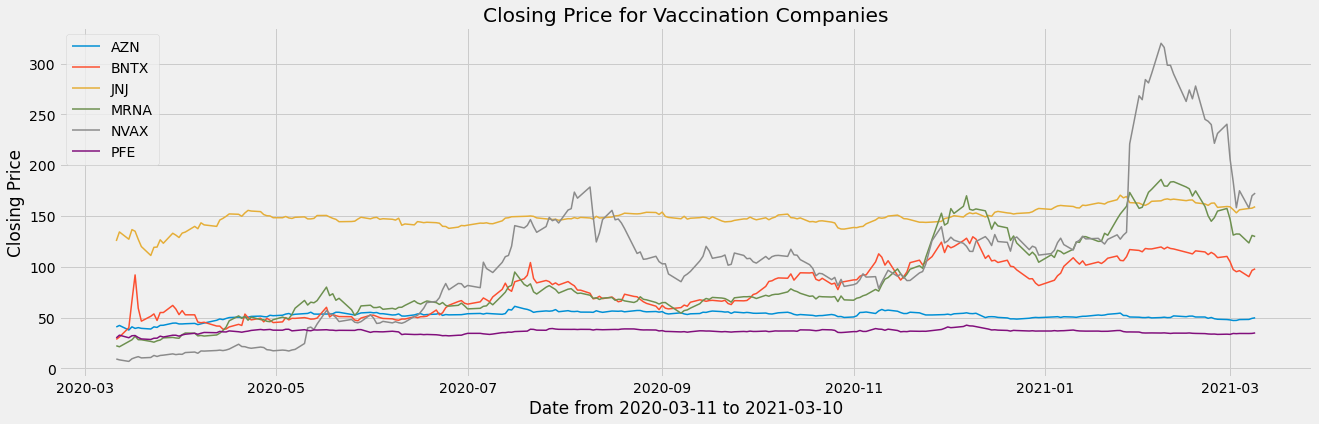

In [18]:
# Import plt and style from matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

# Set style
style.use('fivethirtyeight')

plt.rcParams["figure.figsize"] = (20,6)
fig, ax = plt.subplots()
ax.plot(clean_covid_stocks_with_covid_data["PandemicDate"], clean_covid_stocks_with_covid_data.Closing, linewidth = 1.5)
ax.legend(clean_covid_stocks_with_covid_data.Closing.columns)
plt.title("Closing Price for Vaccination Companies")
plt.xlabel("Date from 2020-03-11 to 2021-03-10")
plt.ylabel("Closing Price")
plt.show()

# Graph of SPX sector across time period

In [19]:
spx_sector_covid_data

,date,spx_close,hlth_close,cons_close,cond_close,enrs_close,finl_close,indu_close,inft_close,matr_close,rlst_close,tels_close,util_close,daily_new_cases,daily_new_deaths
0,2020-03-12,2480.64,985.40,537.00,766.6017,221.69,336.66,490.22,1319.10,271.97,200.75,144.33,275.20,1174.0,4.0
1,2020-03-13,2711.02,1053.92,582.16,813.2361,241.29,381.20,528.60,1476.91,290.78,218.08,157.61,290.48,749.0,7.0
2,2020-03-16,2386.13,948.61,541.45,714.9846,208.41,327.87,468.10,1271.40,257.52,181.99,141.15,256.95,1336.0,21.0
3,2020-03-17,2529.19,1007.95,586.90,743.7777,209.92,346.78,487.75,1357.53,274.66,194.62,146.78,290.64,2442.0,25.0
4,2020-03-18,2398.1,973.71,568.91,707.1269,179.94,316.10,452.86,1295.22,257.74,180.10,142.65,277.16,3738.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2021-03-03,3819.72,1306.46,650.97,1274.6770,372.55,554.87,782.25,2269.80,470.58,228.26,232.14,297.37,67348.0,2271.0
246,2021-03-04,3768.47,1289.06,647.50,1248.9220,381.76,548.17,769.69,2218.58,460.88,226.50,232.22,296.87,68134.0,1998.0
247,2021-03-05,3841.94,1315.14,661.44,1257.9100,396.54,558.63,788.10,2262.26,471.73,229.11,237.73,301.59,69409.0,1800.0
248,2021-03-08,3821.35,1311.39,663.55,1255.5520,397.13,565.84,796.38,2206.54,477.82,230.32,234.25,305.77,44208.0,868.0


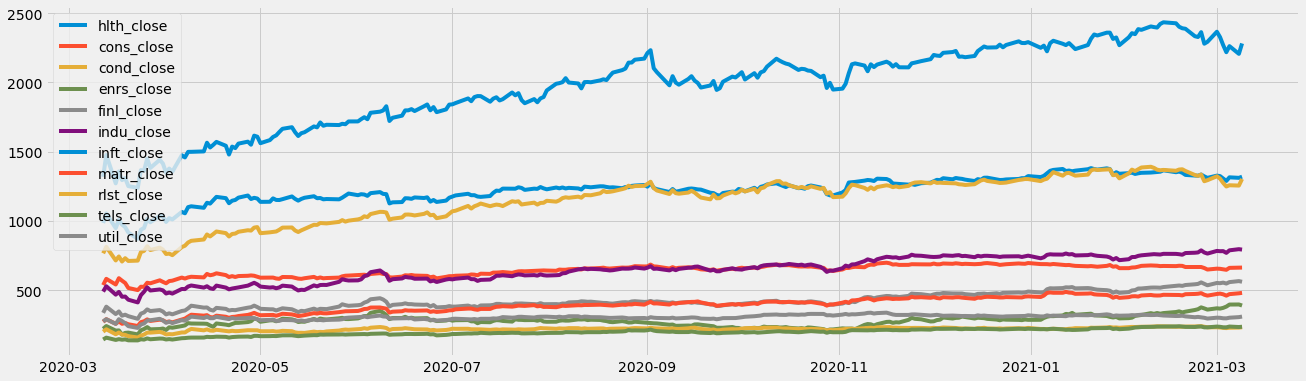

In [20]:
# This is just for reference.
plt.rcParams["figure.figsize"] = (20,6)
fig, ax = plt.subplots()
ax.plot(spx_sector_covid_data["date"], spx_sector_covid_data[["hlth_close","cons_close","cond_close","enrs_close","finl_close","indu_close","inft_close","matr_close","rlst_close","tels_close","util_close"]])
ax.legend(spx_sector_covid_data.columns[2:-2])

*Seems like "S5INFT INDEX  Information Technology" (blue line at the very top) outperformed all the other index.